# Customer Segmentation in Marketing

In [72]:
# Importing libraries

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Reading the provided file

df = pd.read_csv('customer_segmentation_data.csv')
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [74]:
# Descriptive statistics of the data

df.describe()

,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


We notice that we have some missing data

In [76]:
# Check for missing values

df.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [77]:
# Lets make a copy of our df

data = df.copy()

In [78]:
data.shape

(3834, 4)

We noticed that one of the variables has some missing values, namely the minutes watched column. Most likely, these null values correspond to people who've entered the program, but have not seen any content. That's why it's most appropriate, instead of removing them from the dataset, to fill those missing values with zeroes instead. 

In [79]:
# Filling missing data with zeroes

data['minutes_watched'] = data['minutes_watched'].fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3834 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [80]:
# The columns 'region' and 'channel' should be categorical columns

data['region'] = data.minutes_watched.astype('category')
data['channel'] = data.channel.astype('category')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   minutes_watched  3834 non-null   float64 
 1   CLV              3834 non-null   float64 
 2   region           3834 non-null   category
 3   channel          3834 non-null   category
dtypes: category(2), float64(2)
memory usage: 151.3 KB


## Correlation Estimate

In [82]:
data.corr()

,minutes_watched,CLV
minutes_watched,1.000000,0.114153
CLV,0.114153,1.000000


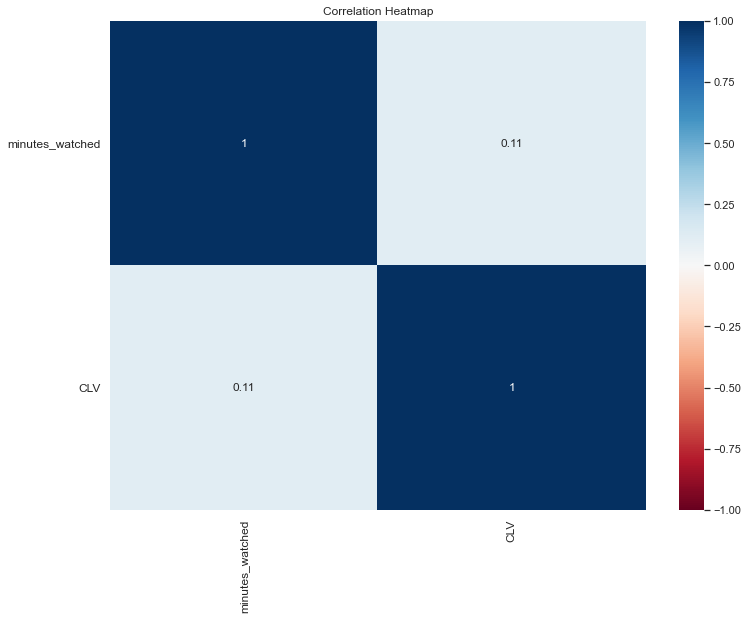

In [83]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(data.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.savefig('corr.png')
plt.show()

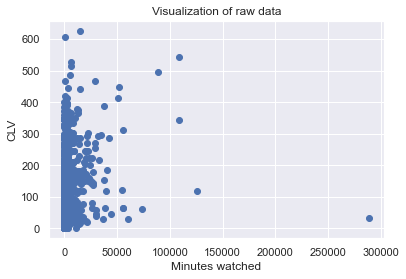

In [84]:
# Scatter Plot Raw Data

y_axis = data['CLV']
x_axis = data['minutes_watched']

# Labeling the x-axis as 'Minutes watched'
plt.xlabel('Minutes watched')

# Labeling the y-axis as 'CLV' (Customer Lifetime Value)
plt.ylabel('CLV')

# Providing a title for the plot
plt.title('Visualization of raw data')

plt.scatter(x_axis, y_axis)
plt.show()

In [85]:
# Create dummy variables for 'region' and 'channel'

dummy_region = pd.get_dummies(data['region'], prefix='region')
dummy_channel = pd.get_dummies(data['channel'], prefix='channel')

# Concatenate the dummy variables with the original DataFrame

data_with_dummies = pd.concat([data, dummy_region, dummy_channel], axis=1)

In [86]:
data_with_dummies.head()

,minutes_watched,CLV,region,channel,region_0.0,region_1.0,region_2.0,region_3.0,region_4.0,region_5.0,...,region_126132.0,region_288508.0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,3197.0,205.42,3197.0,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,63.0,149.99,63.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,605.0,119.00,605.0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,20.0,240.00,20.0,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,245.0,184.36,245.0,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [87]:
# Let's remove the original channel column

data_with_dummies.drop('channel', axis=1, inplace=True)

data_with_dummies.head()

,minutes_watched,CLV,region,region_0.0,region_1.0,region_2.0,region_3.0,region_4.0,region_5.0,region_6.0,...,region_126132.0,region_288508.0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,3197.0,205.42,3197.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,63.0,149.99,63.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,605.0,119.00,605.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,20.0,240.00,20.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,245.0,184.36,245.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [88]:
# Rename the columns after adding the dummie variables
data_with_dummies = data_with_dummies.rename(columns = {'channel_1':'Google', 'channel_2':'Facebook', 'channel_3':'YouTube','channel_4':'LinkedIn', 
                                                    'channel_5':'Twitter', 'channel_6':'Instagram', 'channel_7':'Friend', 'channel_8':'Other',
                                                    'country_region_0':'Region_0','country_region_1':'Region_1','country_region_2':'Region_2'})

data_with_dummies.head()

,minutes_watched,CLV,region,region_0.0,region_1.0,region_2.0,region_3.0,region_4.0,region_5.0,region_6.0,...,region_126132.0,region_288508.0,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other
0,3197.0,205.42,3197.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,63.0,149.99,63.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,605.0,119.00,605.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,20.0,240.00,20.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,245.0,184.36,245.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### MODEL IMPLEMENTATION

In [89]:
# Initializing a StandardScaler object to standardize the features

scaler = StandardScaler()

# Standardizing the data in the 'data_with_dummies' dataframe
# This means transforming the data so that it has a mean of 0 and a standard deviation of 1 for each feature

segmentation_std = scaler.fit_transform(data_with_dummies)

In [90]:
# Performing hierarchical clustering on the standardized data using the 'ward' method
# The 'ward' method minimizes the sum of squared differences within all clusters

hier_clust = linkage(segmentation_std, method = 'ward')

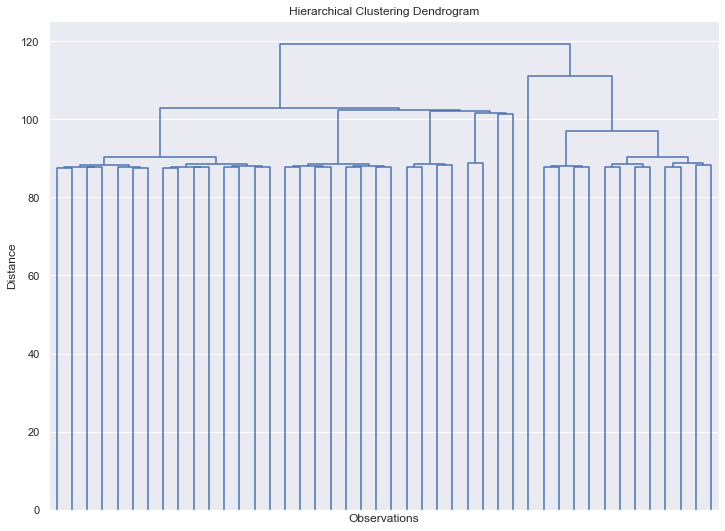

In [94]:
# Setting the figure size for the plot

plt.figure(figsize = (12,9))

# Setting the title of the dendrogram

plt.title('Hierarchical Clustering Dendrogram')

# Labeling the x-axis as 'Observations'

plt.xlabel('Observations')

# Labeling the y-axis as 'Distance'

plt.ylabel('Distance')

# Creating the dendrogram for the hierarchical clustering result
# We're truncating the dendrogram to show only the last 5 merged clusters
# Leaf counts and labels are not displayed

dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)

# Saving the dendrogram plot as a PNG image named 'hierarchical.png'

plt.savefig('hierarchical.png')

# Displaying the dendrogram

plt.show()

## K-means Clustering

In [95]:
# Initializing an empty list to store the Within-Cluster-Sum-of-Squares (WCSS) for different cluster numbers

wcss = []

# Looping through numbers 1 to 10 to evaluate the optimal number of clusters for k-means clustering

for i in range(1,11):
    # Initializing the KMeans algorithm with the current number of clusters (i)
    # Using the 'k-means++' method to initialize the centroids which tends to speed up convergence
    # Setting a random state for reproducibility
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    
    # Fitting the standardized data to the KMeans algorithm
    
    kmeans.fit(segmentation_std)
    
    # Appending the WCSS value (inertia_) of the current clustering to the wcss list
    
    wcss.append(kmeans.inertia_)

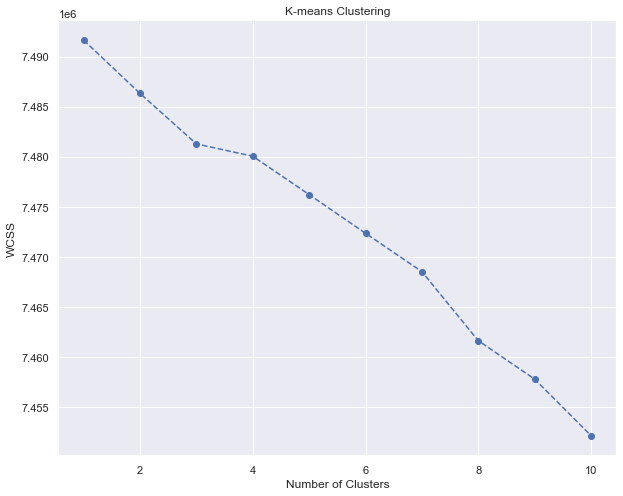

In [96]:
# Setting the figure size for the plot

plt.figure(figsize = (10,8))

# Plotting the WCSS values against the number of clusters
# This is commonly called the Elbow Method, as the elbow point (bend in the line) represents an optimal 
#number of clusters

plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')

# Saving the Elbow Method plot as a PNG image named 'line_chart.png'

plt.savefig('line_chart.png')

# Displaying the plot

plt.show()

In [97]:
# the KMeans algorithm is initialized here with 8 clusters

kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)

In [98]:
# Fitting the standardized data to the KMeans algorithm with 8 clusters

kmeans.fit(segmentation_std)

KMeans(random_state=42)

## MODEL INTERPRETATION AND RESULTS

In [100]:
# Creating a copy of the original 'df_segmentation' dataframe to avoid modifying it directly.
df_segm_kmeans = data_with_dummies.copy()

# Assigning the cluster labels generated by k-means to a new column named 'Segment' in the copied dataframe.
df_segm_kmeans['Segment'] = kmeans.labels_

In [101]:
pd.set_option('display.max_columns', 500)

In [102]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment']).mean()
df_segm_analysis


# Grouping the dataframe by the 'Segment' column and calculating the mean for each segment.
# This provides a profile for each cluster based on the mean values of the original features.
df_segm_analysis = df_segm_kmeans.groupby(['Segment']).mean()

# Displaying the segmented analysis (this line is more relevant in an interactive environment like Jupyter Notebook).
df_segm_analysis

,minutes_watched,CLV,region_0.0,region_1.0,region_2.0,region_3.0,region_4.0,region_5.0,region_6.0,region_7.0,region_8.0,region_9.0,region_10.0,region_11.0,region_12.0,region_13.0,region_14.0,region_15.0,region_16.0,region_17.0,region_18.0,region_19.0,region_20.0,region_21.0,region_22.0,region_23.0,region_24.0,region_25.0,region_26.0,region_27.0,region_28.0,region_29.0,region_30.0,region_31.0,region_32.0,region_33.0,region_34.0,region_35.0,region_36.0,region_37.0,region_38.0,region_39.0,region_40.0,region_41.0,region_42.0,region_43.0,region_44.0,region_45.0,region_46.0,region_47.0,region_48.0,region_49.0,region_50.0,region_51.0,region_52.0,region_53.0,region_54.0,region_55.0,region_56.0,region_57.0,region_58.0,region_59.0,region_60.0,region_61.0,region_62.0,region_63.0,region_64.0,region_65.0,region_66.0,region_67.0,region_68.0,region_69.0,region_70.0,region_71.0,region_72.0,region_73.0,region_74.0,region_75.0,region_76.0,region_77.0,region_78.0,region_79.0,region_80.0,region_81.0,region_82.0,region_83.0,region_84.0,region_85.0,region_86.0,region_87.0,region_88.0,region_89.0,region_90.0,region_91.0,region_92.0,region_93.0,region_94.0,region_95.0,region_96.0,region_97.0,region_98.0,region_99.0,region_100.0,region_101.0,region_103.0,region_104.0,region_105.0,region_106.0,region_107.0,region_108.0,region_109.0,region_110.0,region_111.0,region_112.0,region_113.0,region_114.0,region_115.0,region_116.0,region_117.0,region_118.0,region_119.0,region_120.0,region_121.0,region_122.0,region_123.0,region_124.0,region_125.0,region_126.0,region_127.0,region_128.0,region_129.0,region_130.0,region_131.0,region_132.0,region_133.0,region_134.0,region_135.0,region_136.0,region_137.0,region_138.0,region_139.0,region_140.0,region_141.0,region_142.0,region_143.0,region_144.0,region_145.0,region_146.0,region_147.0,region_148.0,region_149.0,region_150.0,region_151.0,region_152.0,region_153.0,region_154.0,region_155.0,region_156.0,region_157.0,region_158.0,region_159.0,region_160.0,region_161.0,region_162.0,region_163.0,region_164.0,region_165.0,region_166.0,region_167.0,region_168.0,region_169.0,region_170.0,region_171.0,region_172.0,region_173.0,region_174.0,region_175.0,region_176.0,region_177.0,region_178.0,region_179.0,region_180.0,region_181.0,region_182.0,region_183.0,region_184.0,region_185.0,region_186.0,region_187.0,region_188.0,region_189.0,region_190.0,region_191.0,region_192.0,region_193.0,region_194.0,region_195.0,region_196.0,region_197.0,region_198.0,region_199.0,region_200.0,region_201.0,region_202.0,region_203.0,region_204.0,region_205.0,region_206.0,region_207.0,region_208.0,region_209.0,region_210.0,region_211.0,region_212.0,region_213.0,region_214.0,region_215.0,region_216.0,region_217.0,region_218.0,region_219.0,region_220.0,region_221.0,region_222.0,region_223.0,region_224.0,region_225.0,region_226.0,region_227.0,region_228.0,region_229.0,region_230.0,region_231.0,region_232.0,region_233.0,region_234.0,region_235.0,region_236.0,region_237.0,region_238.0,region_240.0,region_241.0,region_242.0,region_243.0,region_245.0,region_246.0,region_247.0,region_248.0,region_249.0,region_250.0,...,region_5849.0,region_5851.0,region_5889.0,region_5896.0,region_5905.0,region_5906.0,region_5912.0,region_5915.0,region_5935.0,region_5940.0,region_5993.0,region_6008.0,region_6012.0,region_6013.0,region_6037.0,region_6057.0,region_6063.0,region_6088.0,region_6127.0,region_6132.0,region_6174.0,region_6194.0,region_6197.0,region_6230.0,region_6261.0,region_6299.0,region_6331.0,region_6380.0,region_6404.0,region_6432.0,region_6438.0,region_6441.0,region_6445.0,region_6463.0,region_6522.0,region_6607.0,region_6627.0,region_6643.0,region_6655.0,region_6671.0,region_6767.0,region_6781.0,region_6783.0,region_6802.0,region_6812.0,region_6853.0,region_6937.0,region_6938.0,region_6999.0,region_7029.0,region_7050.0,region_7207.0,region_7208.0,region_7215.0,region_7270.0,region_7320.0,region_7356.0,region_7413.0,region_7500.0,region_7548.0,region_7561.0,region_

In [105]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment','region_0.0']].groupby(['Segment']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()


# Counting the number of observations in each segment.
# This is done by grouping by 'Segment' and counting the occurrences.
# 'Region_0' is used arbitrarily to count, as it exists in each segment.
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment','region_0.0']].groupby(['Segment']).count()

# Calculating the proportion of observations in each segment.
# This is done by dividing the number of observations in a segment by the total number of observations.
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [106]:
# Rounding the dataframe values to 2 decimal places for cleaner presentation.
df_segm_analysis.round(2)

,minutes_watched,CLV,region_0.0,region_1.0,region_2.0,region_3.0,region_4.0,region_5.0,region_6.0,region_7.0,region_8.0,region_9.0,region_10.0,region_11.0,region_12.0,region_13.0,region_14.0,region_15.0,region_16.0,region_17.0,region_18.0,region_19.0,region_20.0,region_21.0,region_22.0,region_23.0,region_24.0,region_25.0,region_26.0,region_27.0,region_28.0,region_29.0,region_30.0,region_31.0,region_32.0,region_33.0,region_34.0,region_35.0,region_36.0,region_37.0,region_38.0,region_39.0,region_40.0,region_41.0,region_42.0,region_43.0,region_44.0,region_45.0,region_46.0,region_47.0,region_48.0,region_49.0,region_50.0,region_51.0,region_52.0,region_53.0,region_54.0,region_55.0,region_56.0,region_57.0,region_58.0,region_59.0,region_60.0,region_61.0,region_62.0,region_63.0,region_64.0,region_65.0,region_66.0,region_67.0,region_68.0,region_69.0,region_70.0,region_71.0,region_72.0,region_73.0,region_74.0,region_75.0,region_76.0,region_77.0,region_78.0,region_79.0,region_80.0,region_81.0,region_82.0,region_83.0,region_84.0,region_85.0,region_86.0,region_87.0,region_88.0,region_89.0,region_90.0,region_91.0,region_92.0,region_93.0,region_94.0,region_95.0,region_96.0,region_97.0,region_98.0,region_99.0,region_100.0,region_101.0,region_103.0,region_104.0,region_105.0,region_106.0,region_107.0,region_108.0,region_109.0,region_110.0,region_111.0,region_112.0,region_113.0,region_114.0,region_115.0,region_116.0,region_117.0,region_118.0,region_119.0,region_120.0,region_121.0,region_122.0,region_123.0,region_124.0,region_125.0,region_126.0,region_127.0,region_128.0,region_129.0,region_130.0,region_131.0,region_132.0,region_133.0,region_134.0,region_135.0,region_136.0,region_137.0,region_138.0,region_139.0,region_140.0,region_141.0,region_142.0,region_143.0,region_144.0,region_145.0,region_146.0,region_147.0,region_148.0,region_149.0,region_150.0,region_151.0,region_152.0,region_153.0,region_154.0,region_155.0,region_156.0,region_157.0,region_158.0,region_159.0,region_160.0,region_161.0,region_162.0,region_163.0,region_164.0,region_165.0,region_166.0,region_167.0,region_168.0,region_169.0,region_170.0,region_171.0,region_172.0,region_173.0,region_174.0,region_175.0,region_176.0,region_177.0,region_178.0,region_179.0,region_180.0,region_181.0,region_182.0,region_183.0,region_184.0,region_185.0,region_186.0,region_187.0,region_188.0,region_189.0,region_190.0,region_191.0,region_192.0,region_193.0,region_194.0,region_195.0,region_196.0,region_197.0,region_198.0,region_199.0,region_200.0,region_201.0,region_202.0,region_203.0,region_204.0,region_205.0,region_206.0,region_207.0,region_208.0,region_209.0,region_210.0,region_211.0,region_212.0,region_213.0,region_214.0,region_215.0,region_216.0,region_217.0,region_218.0,region_219.0,region_220.0,region_221.0,region_222.0,region_223.0,region_224.0,region_225.0,region_226.0,region_227.0,region_228.0,region_229.0,region_230.0,region_231.0,region_232.0,region_233.0,region_234.0,region_235.0,region_236.0,region_237.0,region_238.0,region_240.0,region_241.0,region_242.0,region_243.0,region_245.0,region_246.0,region_247.0,region_248.0,region_249.0,region_250.0,...,region_5889.0,region_5896.0,region_5905.0,region_5906.0,region_5912.0,region_5915.0,region_5935.0,region_5940.0,region_5993.0,region_6008.0,region_6012.0,region_6013.0,region_6037.0,region_6057.0,region_6063.0,region_6088.0,region_6127.0,region_6132.0,region_6174.0,region_6194.0,region_6197.0,region_6230.0,region_6261.0,region_6299.0,region_6331.0,region_6380.0,region_6404.0,region_6432.0,region_6438.0,region_6441.0,region_6445.0,region_6463.0,region_6522.0,region_6607.0,region_6627.0,region_6643.0,region_6655.0,region_6671.0,region_6767.0,region_6781.0,region_6783.0,region_6802.0,region_6812.0,region_6853.0,region_6937.0,region_6938.0,region_6999.0,region_7029.0,region_7050.0,region_7207.0,region_7208.0,region_7215.0,region_7270.0,region_7320.0,region_7356.0,region_7413.0,region_7500.0,region_7548.0,region_7561.0,region_7567.0,region_7568.0,region_

In [110]:
# Renaming the index labels (which are segment numbers) with more descriptive names.
# This provides a more interpretable profile for each cluster.
df_segm_analysis.rename({0:'Instagram',
                         1:'LinkedIn',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel', 
                         5:'European Multi-Channel',
                         6:'Twitter',
                         7:'Facebook', 
                        })


,minutes_watched,CLV,region_0.0,region_1.0,region_2.0,region_3.0,region_4.0,region_5.0,region_6.0,region_7.0,region_8.0,region_9.0,region_10.0,region_11.0,region_12.0,region_13.0,region_14.0,region_15.0,region_16.0,region_17.0,region_18.0,region_19.0,region_20.0,region_21.0,region_22.0,region_23.0,region_24.0,region_25.0,region_26.0,region_27.0,region_28.0,region_29.0,region_30.0,region_31.0,region_32.0,region_33.0,region_34.0,region_35.0,region_36.0,region_37.0,region_38.0,region_39.0,region_40.0,region_41.0,region_42.0,region_43.0,region_44.0,region_45.0,region_46.0,region_47.0,region_48.0,region_49.0,region_50.0,region_51.0,region_52.0,region_53.0,region_54.0,region_55.0,region_56.0,region_57.0,region_58.0,region_59.0,region_60.0,region_61.0,region_62.0,region_63.0,region_64.0,region_65.0,region_66.0,region_67.0,region_68.0,region_69.0,region_70.0,region_71.0,region_72.0,region_73.0,region_74.0,region_75.0,region_76.0,region_77.0,region_78.0,region_79.0,region_80.0,region_81.0,region_82.0,region_83.0,region_84.0,region_85.0,region_86.0,region_87.0,region_88.0,region_89.0,region_90.0,region_91.0,region_92.0,region_93.0,region_94.0,region_95.0,region_96.0,region_97.0,region_98.0,region_99.0,region_100.0,region_101.0,region_103.0,region_104.0,region_105.0,region_106.0,region_107.0,region_108.0,region_109.0,region_110.0,region_111.0,region_112.0,region_113.0,region_114.0,region_115.0,region_116.0,region_117.0,region_118.0,region_119.0,region_120.0,region_121.0,region_122.0,region_123.0,region_124.0,region_125.0,region_126.0,region_127.0,region_128.0,region_129.0,region_130.0,region_131.0,region_132.0,region_133.0,region_134.0,region_135.0,region_136.0,region_137.0,region_138.0,region_139.0,region_140.0,region_141.0,region_142.0,region_143.0,region_144.0,region_145.0,region_146.0,region_147.0,region_148.0,region_149.0,region_150.0,region_151.0,region_152.0,region_153.0,region_154.0,region_155.0,region_156.0,region_157.0,region_158.0,region_159.0,region_160.0,region_161.0,region_162.0,region_163.0,region_164.0,region_165.0,region_166.0,region_167.0,region_168.0,region_169.0,region_170.0,region_171.0,region_172.0,region_173.0,region_174.0,region_175.0,region_176.0,region_177.0,region_178.0,region_179.0,region_180.0,region_181.0,region_182.0,region_183.0,region_184.0,region_185.0,region_186.0,region_187.0,region_188.0,region_189.0,region_190.0,region_191.0,region_192.0,region_193.0,region_194.0,region_195.0,region_196.0,region_197.0,region_198.0,region_199.0,region_200.0,region_201.0,region_202.0,region_203.0,region_204.0,region_205.0,region_206.0,region_207.0,region_208.0,region_209.0,region_210.0,region_211.0,region_212.0,region_213.0,region_214.0,region_215.0,region_216.0,region_217.0,region_218.0,region_219.0,region_220.0,region_221.0,region_222.0,region_223.0,region_224.0,region_225.0,region_226.0,region_227.0,region_228.0,region_229.0,region_230.0,region_231.0,region_232.0,region_233.0,region_234.0,region_235.0,region_236.0,region_237.0,region_238.0,region_240.0,region_241.0,region_242.0,region_243.0,region_245.0,region_246.0,region_247.0,region_248.0,region_249.0,region_250.0,...,region_5889.0,region_5896.0,region_5905.0,region_5906.0,region_5912.0,region_5915.0,region_5935.0,region_5940.0,region_5993.0,region_6008.0,region_6012.0,region_6013.0,region_6037.0,region_6057.0,region_6063.0,region_6088.0,region_6127.0,region_6132.0,region_6174.0,region_6194.0,region_6197.0,region_6230.0,region_6261.0,region_6299.0,region_6331.0,region_6380.0,region_6404.0,region_6432.0,region_6438.0,region_6441.0,region_6445.0,region_6463.0,region_6522.0,region_6607.0,region_6627.0,region_6643.0,region_6655.0,region_6671.0,region_6767.0,region_6781.0,region_6783.0,region_6802.0,region_6812.0,region_6853.0,region_6937.0,region_6938.0,region_6999.0,region_7029.0,region_7050.0,region_7207.0,region_7208.0,region_7215.0,region_7270.0,region_7320.0,region_7356.0,region_7413.0,region_7500.0,region_7548.0,region_7561.0,region_7567.0,region_7568.0,region_

In [113]:
# Mapping the cluster numbers (Segment) to more human-readable labels using a dictionary.
# This helps in interpreting the clusters in plots and other visualizations.
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment'].map({0:'Instagram',
                         1:'LinkedIn',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel', 
                         5:'European Multi-Channel',
                         6:'Twitter',
                         7:'Facebook', 
                        })

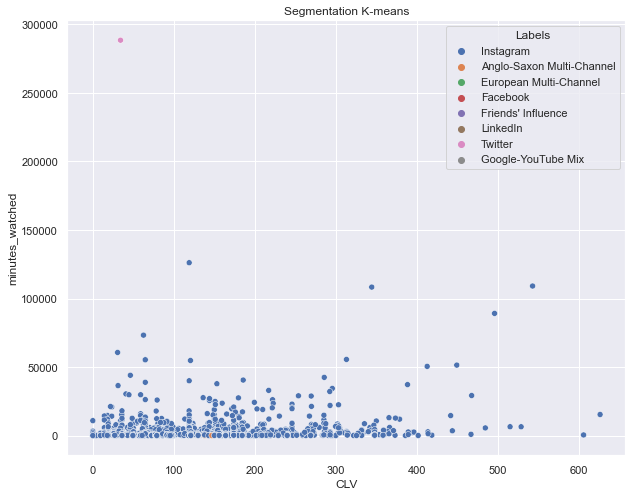

In [114]:
# Defining the x-axis data as 'total_payments' from the dataframe.
x_axis = df_segm_kmeans['CLV']

# Defining the y-axis data as 'minutes_watched' from the dataframe
y_axis = df_segm_kmeans['minutes_watched']

# Setting the figure size for the scatter plot.
plt.figure(figsize = (10, 8))

# Creating a scatter plot using seaborn.
# The 'hue' parameter colors the points based on the 'Labels' column, allowing for distinction between clusters.
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_kmeans['Labels'])

# Setting the title of the scatter plot.
plt.title('Segmentation K-means')

# Displaying the scatter plot.
plt.show()